In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
# Define the file path or URL for the Iris dataset in CSV format.
url = "iris.data.csv"

# Read the dataset into a Pandas DataFrame, specifying custom column names.
df = pd.read_csv(url, names=["sepal length", "sepal width", "petal length", "petal width", "class"])


In [ ]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Import the StandardScaler for feature scaling.
from sklearn.preprocessing import StandardScaler

# Define feature column names and extract feature and target data from the DataFrame.
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:, ['class']].values

# Standardize the feature data using StandardScaler.
x = StandardScaler().fit_transform(x)

In [ ]:
# Import PCA from scikit-learn and configure it for 2 components.
pca = PCA(n_components=2)

# Apply PCA to the standardized feature data to obtain principal components.
principalComponents = pca.fit_transform(x)

# Create a DataFrame to hold the principal components with specified column names.
principalDataframe = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

In [ ]:
# Extract the target class data into a separate DataFrame.
targetDataframe = df[['class']]

# Combine the principal components DataFrame and the target class DataFrame horizontally.
newDataframe = pd.concat([principalDataframe, targetDataframe], axis=1)

In [ ]:
# newDataframe contains the combined data of principal components and target class labels.
newDataframe

,PC1,PC2,class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


Text(0, 0.5, 'PC2')

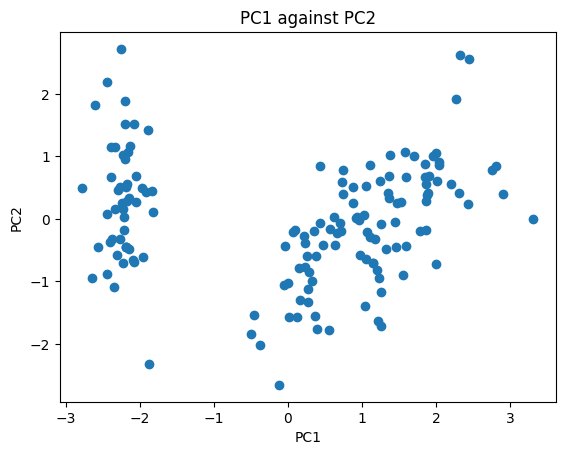

In [ ]:
# Create a scatter plot of PC1 against PC2.
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)

# Set the plot title and axis labels for clear visualization.
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

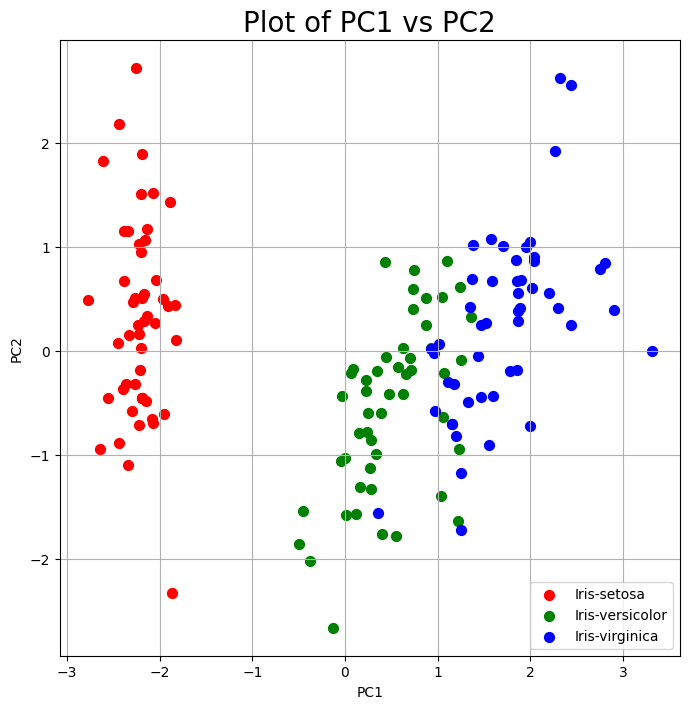

In [ ]:
# Create a scatter plot with labeled points, legend, and customized appearance.
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Plot of PC1 vs PC2', fontsize=20)

# Define class labels and colors, then plot the data points with different colors.
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    # Select and scatter data points based on class label.
    indicesToKeep = newDataframe['class'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1'],
               newDataframe.loc[indicesToKeep, 'PC2'],
               c=color, s=50)

ax.legend(targets)  # Display the legend.
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])